# implementing the Learning Curves

## import the data

In [2]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
X, y = load_breast_cancer(return_X_y=True,
                          as_frame=True)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## get the training and testing dataset

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
len(X_train), len(y_train), len(X_test), len(y_test)

(398, 398, 171, 171)

## fit into the model

In [7]:
#import the logistic regression
from sklearn.linear_model import LogisticRegression

In [8]:
clf = LogisticRegression(random_state=0, max_iter=100000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=100000, random_state=0)

In [9]:
y_preds = clf.predict(X_test)

In [10]:
y_preds

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

### get the confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_preds)
cm

array([[ 58,   4],
       [  2, 107]])

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_test, y_pred=y_preds)

0.9649122807017544

## get the Learning Curve

In [13]:
from sklearn.model_selection import KFold, learning_curve


train_sizes = np.linspace(0.1, 1.0, 5)
cv = KFold(n_splits=5)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=cv, train_sizes=train_sizes, n_jobs=-1, scoring='accuracy'
)


In [14]:
train_sizes

array([ 45, 147, 250, 352, 455])

In [15]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.97278912, 0.97278912, 0.95918367, 0.95918367, 0.95918367],
       [0.968     , 0.968     , 0.976     , 0.968     , 0.968     ],
       [0.96590909, 0.96022727, 0.96875   , 0.95454545, 0.96590909],
       [0.96483516, 0.95604396, 0.96483516, 0.96043956, 0.96483516]])

In [16]:
test_scores

array([[0.94736842, 0.9122807 , 0.87719298, 0.86842105, 0.68141593],
       [0.95614035, 0.95614035, 0.94736842, 0.93859649, 0.87610619],
       [0.92982456, 0.95614035, 0.94736842, 0.95614035, 0.9380531 ],
       [0.9122807 , 0.95614035, 0.95614035, 0.95614035, 0.9380531 ],
       [0.9122807 , 0.95614035, 0.96491228, 0.96491228, 0.9380531 ]])

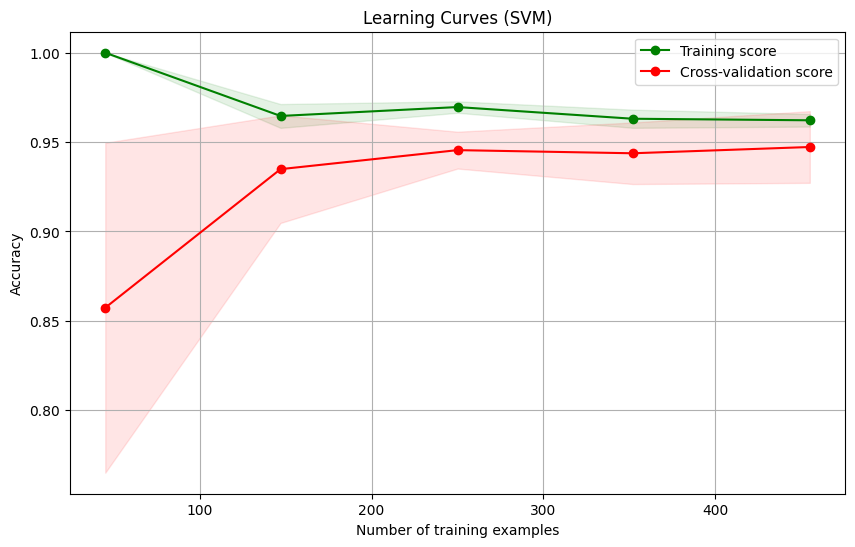

In [17]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Learning Curves (SVM)")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot training scores with error bars
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="g", label="Training score")

# Plot validation scores with error bars
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")

plt.legend(loc="best")
plt.show()